In this lecture, we study how we Python's modules related to time.

Your computer’s system clock is set to a specific date, time, and time zone. The built-in 'time' module allows your Python programs to read the system clock for the current time. The time.time() and time.sleep() functions are the most useful in the time module.

The Unix epoch is a time reference commonly used in programming: 12 AM on January 1, 1970, Coordinated Universal Time (UTC), depending on the module version you are using. The time.time() function returns the number of seconds since that moment as a float value (recall that a float is just a number with a decimal point). This number is called an epoch timestamp. 

In [2]:
import time
time.time() # the return value is how many seconds have passed between the Unix epoch and when time.time() was called
import os
os.chdir("C:\\Users\\GAO\\Anaconda\\Gao_Jupyter_Notebook_Python_Codes\\Automate the Boring Stuff with Python\\Datasets and Files")

Epoch timestamps can be used to profile code, that is, measure how long a piece of code takes to run. If you call time.time() at the beginning of the code block you want to measure and again at the end, you can subtract the first timestamp from the second to find the elapsed time between those two calls. This type of coding is often used to calculate programs' processing times and record the ETL efficiency in large corporations. Below is an example:

In [3]:
import getpass
executor=getpass.getuser()
def calcProd(): # calculate the product of the first 100,000 numbers 
    product = 1
    for i in range(1, 100000):
        product = product * i
    return product
startTime = time.time()
prod = calcProd()
endTime = time.time()
print('The run time for the current program took %s seconds to calculate.' % (endTime - startTime))
print('The program was executed by the user: ', str(executor))

The run time for the current program took 2.944000005722046 seconds to calculate.
The program was executed by the user:  GAO


If you need to pause your program for a while, call the time.sleep() function and pass it the number of seconds you want your program to stay paused. Below is an example. Observe how the output of the program behaves:

In [3]:
for i in range(3):
    print('Tick')
    time.sleep(2)
    print('Tock')
    time.sleep(2)

Tick
Tock
Tick
Tock
Tick
Tock


When working with times, you’ll often encounter float values with many digits after the decimal. To make these values easier to work with, you can shorten them with Python’s built-in round() function, which rounds a float to the precision you specify. Just pass in the number you want to round, plus an optional second argument representing how many digits after the decimal point you want to round it to. If you omit the second argument, round() rounds your number to the nearest whole integer.

In [4]:
now = time.time()
print(now)
print(round(now, 2))
print(round(now, 4))

1515010978.91485
1515010978.91
1515010978.9148


The 'time' module is useful for getting a Unix epoch timestamp to work with. But if you want to display a date in a more convenient format, or do arithmetic with dates (for example, figuring out what date was 205 days ago or what date is 123 days from now), you should use the 'datetime' module.

The 'datetime' module has its own 'datetime' data type. 'datetime' values represent a specific moment in time.

In [5]:
import datetime
print(datetime.datetime.now())
dt = datetime.datetime(2015, 10, 21, 16, 29, 0)
print(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)

2018-01-03 14:22:58.954850
2015 10 21 16 29 0


A Unix epoch timestamp can be converted to a datetime object with the datetime.datetime.fromtimestamp() function. The date and time of the 'datetime' object will be converted for the local time zone:

In [6]:
print(datetime.datetime.fromtimestamp(1000000))
print(datetime.datetime.fromtimestamp(time.time()))

1970-01-12 07:46:40
2018-01-03 14:22:58.990850


Calling datetime.datetime.fromtimestamp() and passing it 1,000,000 returns a 'datetime' object for the moment 1,000,000 seconds after the Unix epoch. Passing time.time(), the Unix epoch timestamp for the current moment, returns a 'datetime' object for the current moment. So the expressions datetime.datetime.now() and datetime.datetime.fromtimestamp(time.time()) do the same thing; they both give you a 'datetime' object for the present moment.

The 'datetime' objects can be compared with each other using comparison operators to find out which one precedes the other. The later 'datetime' object is the 'greater' value:

In [7]:
halloween2015 = datetime.datetime(2015, 10, 31, 0, 0, 0)
newyears2016 = datetime.datetime(2016, 1, 1, 0, 0, 0)
oct31_2015 = datetime.datetime(2015, 10, 31, 0, 0, 0)
print(halloween2015 == oct31_2015, newyears2016 > halloween2015, newyears2016 != oct31_2015)

True True True


The 'datetime' module also provides a 'timedelta' data type, which represents a duration of time rather than a moment in time. Below is an example:

In [8]:
delta = datetime.timedelta(days=11, hours=10, minutes=9, seconds=8)
print(delta.days, delta.seconds, delta.microseconds)
print(delta.total_seconds())

11 36548 0
986948.0


The datetime.timedelta() function takes keyword arguments 'weeks', 'days', 'hours', 'minutes', 'seconds', 'milliseconds', and 'microseconds'. There is no 'month' or 'year' keyword argument because a month or a year is a variable amount of time depending on the particular month or year. A 'timedelta' object has the total duration represented in days, seconds, and microseconds. These numbers are stored in the 'days', 'seconds', and 'microseconds' attributes, respectively. The total_seconds() method will return the duration in number of seconds alone. Passing a 'timedelta' object to str() will return a nicely formatted, human-readable string representation of the object. For example:

In [9]:
print(str(delta))

11 days, 10:09:08


Now comes the most important topic: arithmetic operations on time-related objects. The arithmetic operators can be used to perform date arithmetic on 'datetime' values. For example, to calculate the date 1,000 days from now, enter the following:

In [10]:
dt = datetime.datetime.now()
print('current time: ', dt)
datetime.datetime(2015, 2, 27, 18, 38, 50, 636181)
thousanddays = datetime.timedelta(days=1000)
print('1000 days later: ', dt + thousanddays)

current time:  2018-01-03 14:22:59.144850
1000 days later:  2020-09-29 14:22:59.144850


The 'timedelta' objects can be added or subtracted with 'datetime' objects or other 'timedelta' objects using the + and - operators. A 'timedelta' object can be multiplied or divided by integer or float values with the * and / operators:

In [11]:
oct21st = datetime.datetime(2018, 10, 21, 16, 29, 0)
aboutThirtyYears = datetime.timedelta(days=365 * 30)
print(oct21st)
print(oct21st - aboutThirtyYears)
print(oct21st - (2 * aboutThirtyYears))

2018-10-21 16:29:00
1988-10-28 16:29:00
1958-11-05 16:29:00


Now let's talk about converting 'DataTime' into strings. Epoch 'timestamps' and 'datetime' objects aren’t very friendly to the human eye. One can use the strftime() method to display a datetime object as a string (the 'f' in the name of the strftime() function stands for format). The strftime() method uses directives similar to Python’s string formatting. Pass strrftime() a custom format string containing formatting directives (along with any desired slashes, colons, and so on), and strftime() will return the 'datetime' object’s information as a formatted string.

The table below has a full list of strftime() directives:

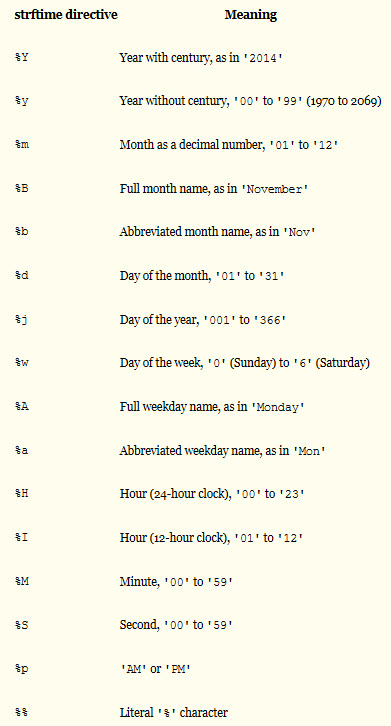

In [12]:
from IPython.display import Image
Image("ch15_snapshot_1.jpg") 

In [21]:
print(datetime.datetime.strptime('October 21, 2015', '%B %d, %Y'))
print(datetime.datetime.strptime('2015/10/21 16:29:00', '%Y/%m/%d %H:%M:%S'))
print(datetime.datetime.strptime("October of '15", "%B of '%y"))
print(type(datetime.datetime.strptime("October of '15", "%B of '%y")))

2015-10-21 00:00:00
2015-10-21 16:29:00
2015-10-01 00:00:00
<class 'datetime.datetime'>
